In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

HermiteGf is a julia package, install it with

```julia
using Pkg
Pkg.add("https://gitlab.mpcdf.mpg.de/clapp/HermiteGF.jl")
```

In [2]:
using HermiteGF

┌ Info: Recompiling stale cache file /Users/navaro/.julia/compiled/v1.0/HermiteGF/V9Jve.ji for HermiteGF [6d312152-d853-11e8-033d-978d5c49d094]
└ @ Base loading.jl:1187


In [3]:
xmin, xmax, nx = -1, 1, 11
ϵ, γ = 0.1, 3.0
interp = Hermite(Chebyshev(xmin, xmax, nx), ϵ, γ)  

Hermite(11, 0.1, 3.0, [-1.0, -0.951057, -0.809017, -0.587785, -0.309017, 0.0, 0.309017, 0.587785, 0.809017, 0.951057, 1.0], [1.31809 -5.59218 … 39.3516 -66.9008; 1.31935 -5.32356 … 39.5205 -40.188; … ; 1.31935 5.32356 … -39.5205 -40.188; 1.31809 5.59218 … -39.3516 -66.9008])

Set the nodes values to the function to interpolate

In [7]:
xk = interp.nodes
fk =  cos.(xk.^2)

11-element Array{Float64,1}:
 0.5403023058681398
 0.6180720354846396
 0.793347235780697 
 0.9409091143249955
 0.9954441499490891
 1.0               
 0.9954441499490891
 0.9409091143249955
 0.793347235780697 
 0.6180720354846395
 0.5403023058681398

Set the points where the function is interpolated

In [8]:
xe = collect(range(xmin, stop=xmax, length=100))
dx = xe[2]-xe[1]
fe = cos.(xe.^2) # exact solution

100-element Array{Float64,1}:
 0.5403023058681398
 0.5735166427697789
 0.6051640523576186
 0.6352524488400179
 0.6637957668672448
 0.6908134406180657
 0.7163298950120459
 0.7403740512263007
 0.7629788483616076
 0.7841807827891059
 0.8040194664158393
 0.8225372048354683
 0.8397785960796651
 ⋮                 
 0.8225372048354683
 0.8040194664158393
 0.7841807827891059
 0.7629788483616076
 0.7403740512263007
 0.7163298950120459
 0.6908134406180657
 0.6637957668672448
 0.6352524488400179
 0.6051640523576186
 0.5735166427697789
 0.5403023058681398

Interpolation

In [9]:
s  = interpolate( interp, fk, xe )
maximum(abs.(s .- fe))

1.2063619883040388e-6

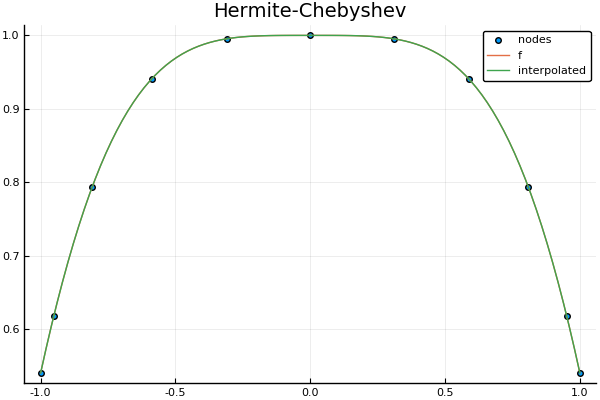

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [13]:
scatter(xk, fk, title="Hermite-Chebyshev", label="nodes")
plot!(xe, fe; label="f")
plot!(xe, s; label="interpolated")